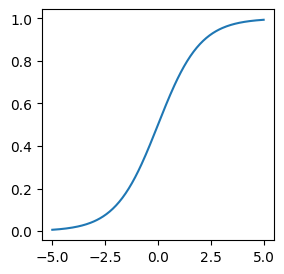

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1+np.exp(-z))
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,sigmoid(z))
plt.show()

In [2]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50,activation='relu',
                              kernel_initializer='he_normal')

In [3]:
he_avg_int = tf.keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                                   distribution='uniform')
dense = tf.keras.layers.Dense(50,activation='sigmoid',
                              kernel_initializer=he_avg_int)

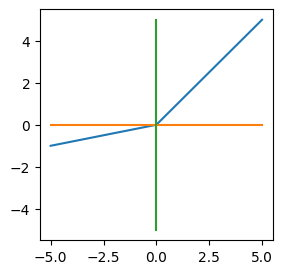

In [4]:
def leaky_relu(z,alpha):
    return np.maximum(alpha * z,z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,leaky_relu(z,0.2))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

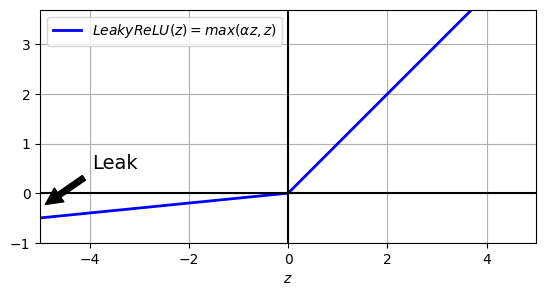

In [5]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [6]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) #default alpha = 0.3
dense = tf.keras.layers.Dense(50,activation=leaky_relu,
                              kernel_initializer='he_normal')

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

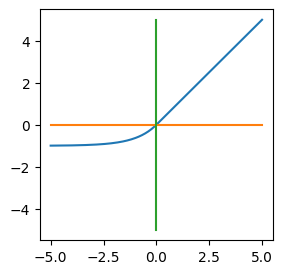

In [8]:
def elu(z,alpha=1):
    return np.where(z<0,alpha * (np.exp(z)-1),z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,elu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

In [9]:
dense = tf.keras.layers.Dense(50,activation='elu',kernel_initializer='he_normal')

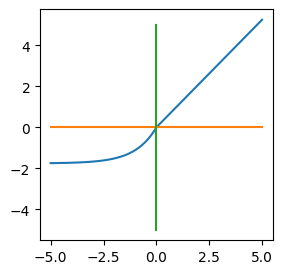

In [10]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)
def selu(z,scale=scale_0_1,alpha=alpha_0_1):
    return scale * elu(z,alpha)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,selu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

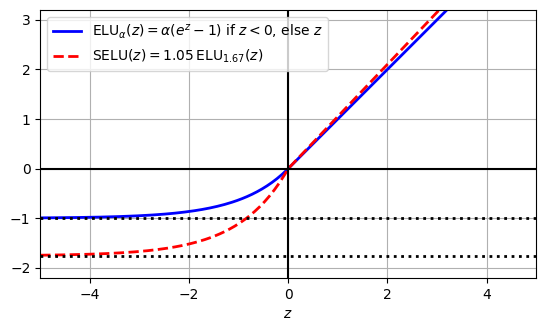

In [11]:
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [12]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation='selu',
                                    kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,10

 Total params: 1,079,410 (4.12 MB)

 Trainable params: 1,079,410 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
pixel_means = X_train.mean(axis=0,keepdims=True)
pixel_stds = X_train.std(axis=0,keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5241 - loss: 1.2646 - val_accuracy: 0.6788 - val_loss: 0.8571
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6770 - loss: 0.8468 - val_accuracy: 0.7296 - val_loss: 0.7768
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7101 - loss: 0.7790 - val_accuracy: 0.7466 - val_loss: 0.6879
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7213 - loss: 0.7758 - val_accuracy: 0.7650 - val_loss: 0.6630
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7591 - loss: 0.6522 - val_accuracy: 0.7778 - val_loss: 0.6295


In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2076 - loss: 1.9875 - val_accuracy: 0.2716 - val_loss: 1.6194
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4226 - loss: 1.3393 - val_accuracy: 0.3852 - val_loss: 1.3177
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5448 - loss: 1.1115 - val_accuracy: 0.3056 - val_loss: 1.6709
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5294 - loss: 1.1875 - val_accuracy: 0.5942 - val_loss: 0.9709
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6117 - loss: 0.9949 - val_accuracy: 0.4706 - val_loss: 1.5471


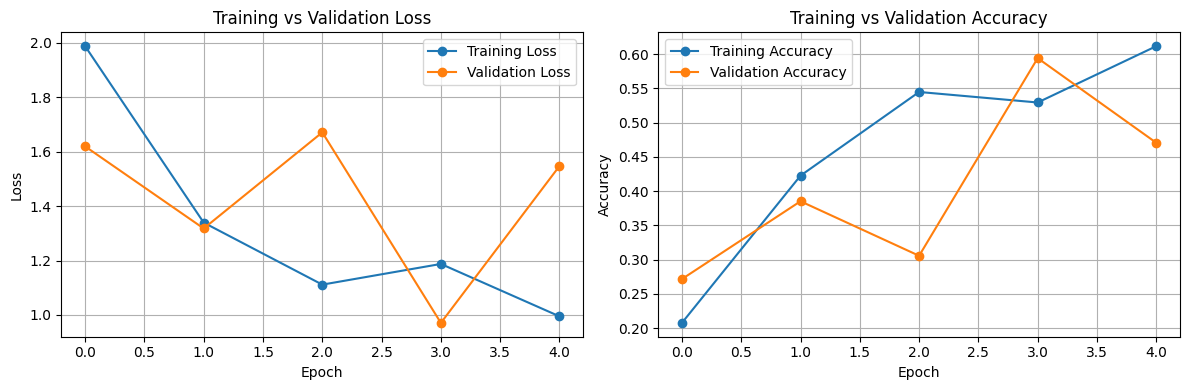

In [23]:
# Plot Training vs Validation Loss
plt.figure(figsize=(12, 4))

# ---- LOSS ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- ACCURACY ----
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

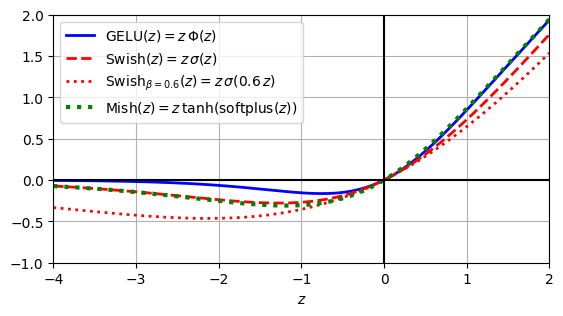

In [24]:
def swish(z,beta=1):
    return z * sigmoid(beta*z)
def approx_gelu(z):
    return swish(z,beta=1.702)
def softplus(z):
    return np.log(1+np.exp(z))
def mish(z):
    return z * np.tanh(softplus(z))
z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [28]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8070 - loss: 0.5490 - val_accuracy: 0.8566 - val_loss: 0.4048
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3918 - val_accuracy: 0.8670 - val_loss: 0.3732


In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7998 - loss: 0.6038 - val_accuracy: 0.8440 - val_loss: 0.4399
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8529 - loss: 0.4206 - val_accuracy: 0.8568 - val_loss: 0.3960


In [33]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [34]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [35]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.3692 - val_accuracy: 0.8670 - val_loss: 0.3735
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8777 - loss: 0.3462 - val_accuracy: 0.8682 - val_loss: 0.3652


In [36]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B) = split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B) = split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B) = split_dataset(X_test,y_test)

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8,activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model.fit(X_train_A,y_train_A,epochs=20,
                    validation_data=(X_valid_A,y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8032 - loss: 0.6037 - val_accuracy: 0.8980 - val_loss: 0.2882
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9026 - loss: 0.2805 - val_accuracy: 0.9113 - val_loss: 0.2535
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9171 - loss: 0.2423 - val_accuracy: 0.9163 - val_loss: 0.2395
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9250 - loss: 0.2187 - val_accuracy: 0.9190 - val_loss: 0.2318
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9310 - loss: 0.2012 - val_accuracy: 0.9210 - val_loss: 0.2268
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9357 - loss: 0.1869 - val_accuracy: 0.9228 - val_loss: 0.2231
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9404 - loss: 0.1747 - val_accuracy: 0.9238 - val_loss: 0.2209
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9444 - loss: 0.1638 - 

In [37]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model_B.fit(X_train_B,y_train_B,epochs=20,
                      validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.4224 - val_accuracy: 0.9436 - val_loss: 0.2675
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9447 - loss: 0.2230 - val_accuracy: 0.9496 - val_loss: 0.1890
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9487 - loss: 0.1780 - val_accuracy: 0.9515 - val_loss: 0.1632
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9513 - loss: 0.1598 - val_accuracy: 0.9505 - val_loss: 0.1508
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9528 - loss: 0.1497 - val_accuracy: 0.9505 - val_loss: 0.1434
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9544 - loss: 0.1430 - val_accuracy: 0.9486 - val_loss: 0.1383
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9551 - loss: 0.1380 - val_accuracy: 0.9496 - val_loss: 0.1344
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9562 - loss: 0.1339 - val_accuracy: 0.

[0.12268353998661041, 0.9580000042915344]

In [38]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [39]:
tf.random.set_seed(42)

In [40]:
model_A_clone =tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [41]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [42]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

In [43]:
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                           validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6496 - loss: 0.6600 - val_accuracy: 0.7082 - val_loss: 0.6445
Epoch 2/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7411 - loss: 0.6343 - val_accuracy: 0.7784 - val_loss: 0.6189
Epoch 3/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7937 - loss: 0.6109 - val_accuracy: 0.8180 - val_loss: 0.5957
Epoch 4/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8238 - loss: 0.5896 - val_accuracy: 0.8487 - val_loss: 0.5746
Epoch 1/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.3539 - val_accuracy: 0.9535 - val_loss: 0.2364
Epoch 2/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9486 - loss: 0.2057 - val_accuracy: 0.9515 - val_loss: 0.1719
Epoch 3/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9531 - loss: 0.1681 - val_accuracy: 0.9505 - val_loss: 0.1494
Epoch 4/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9548 - loss: 0.1527 - val_accuracy: 0.9505

In [45]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9575 - loss: 0.1282  


[0.12819790840148926, 0.9574999809265137]

In [48]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(100,activation='relu',
                              kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid,y_valid))

In [49]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [50]:
history_sgd = build_and_train_model(optimizer)

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5710 - loss: 1.3934 - val_accuracy: 0.7138 - val_loss: 0.9117
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7360 - loss: 0.8052 - val_accuracy: 0.7700 - val_loss: 0.6982
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7771 - loss: 0.6683 - val_accuracy: 0.7948 - val_loss: 0.6111
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7975 - loss: 0.6006 - val_accuracy: 0.8102 - val_loss: 0.5616
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8101 - loss: 0.5596 - val_accuracy: 0.8178 - val_loss: 0.5301
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8189 - loss: 0.5319 - val_accuracy: 0.8242 - val_loss: 0.5078
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8251 - loss: 0.5114 - val_accuracy: 0.8308 - val_loss: 0.4914
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8301 - loss: 0.4953 - 

In [51]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [52]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10


c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7684 - loss: 0.6852 - val_accuracy: 0.8156 - val_loss: 0.5029
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8377 - loss: 0.4613 - val_accuracy: 0.8380 - val_loss: 0.4439
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 0.4171 - val_accuracy: 0.8452 - val_loss: 0.4149
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.3916 - val_accuracy: 0.8508 - val_loss: 0.3974
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3729 - val_accuracy: 0.8550 - val_loss: 0.3858
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8718 - loss: 0.3575 - val_accuracy: 0.8578 - val_loss: 0.3789
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8762 - loss: 0.3448 - val_accuracy: 0.8574 - val_loss: 0.3750
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8801 - loss: 0.3334 - val_accurac

In [53]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [54]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10


c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7716 - loss: 0.6766 - val_accuracy: 0.8248 - val_loss: 0.4898
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8390 - loss: 0.4588 - val_accuracy: 0.8386 - val_loss: 0.4471
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8520 - loss: 0.4192 - val_accuracy: 0.8454 - val_loss: 0.4252
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3951 - val_accuracy: 0.8496 - val_loss: 0.4089
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8666 - loss: 0.3770 - val_accuracy: 0.8516 - val_loss: 0.3972
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3622 - val_accuracy: 0.8568 - val_loss: 0.3874
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3496 - val_accuracy: 0.8602 - val_loss: 0.3801
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 0.3388 - val_accurac

In [55]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [56]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10


c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6817 - loss: 0.9690 - val_accuracy: 0.7782 - val_loss: 0.6849
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7901 - loss: 0.6437 - val_accuracy: 0.8082 - val_loss: 0.5818
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8118 - loss: 0.5714 - val_accuracy: 0.8198 - val_loss: 0.5363
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8219 - loss: 0.5332 - val_accuracy: 0.8272 - val_loss: 0.5092
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8293 - loss: 0.5086 - val_accuracy: 0.8328 - val_loss: 0.4911
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8346 - loss: 0.4910 - val_accuracy: 0.8362 - val_loss: 0.4772
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8390 - loss: 0.4775 - val_accuracy: 0.8376 - val_loss: 0.4662
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8427 - loss: 0.4665 - val_accurac

In [57]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [58]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10


c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8102 - loss: 0.5220 - val_accuracy: 0.8420 - val_loss: 0.4140
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.3932 - val_accuracy: 0.8498 - val_loss: 0.4098
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3649 - val_accuracy: 0.8532 - val_loss: 0.4120
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3519 - val_accuracy: 0.8356 - val_loss: 0.4738
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8793 - loss: 0.3463 - val_accuracy: 0.8416 - val_loss: 0.4927
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8814 - loss: 0.3407 - val_accuracy: 0.8620 - val_loss: 0.4297
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8838 - loss: 0.3344 - val_accuracy: 0.8674 - val_loss: 0.4268
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3305 - val_accurac

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [60]:
history_adam = build_and_train_model(optimizer)

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8209 - loss: 0.4981 - val_accuracy: 0.8378 - val_loss: 0.4092
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8624 - loss: 0.3751 - val_accuracy: 0.8356 - val_loss: 0.4092
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3401 - val_accuracy: 0.8494 - val_loss: 0.3859
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8849 - loss: 0.3156 - val_accuracy: 0.8576 - val_loss: 0.3792
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8899 - loss: 0.2978 - val_accuracy: 0.8638 - val_loss: 0.3683
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8955 - loss: 0.2821 - val_accuracy: 0.8656 - val_loss: 0.3719
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8995 - loss: 0.2700 - val_accuracy: 0.8682 - val_loss: 0.3531
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9043 - loss: 0.2566 - 